# ML-diagnosis-of-esophageal-cancer
## Data Analysis Notebook
Authors: Robert Franklin, Brianna O'Connor, Marisa Duong

Date: 2023-03-13

In [1]:
# Dependencies & Installs
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# read CB_df_cleaned.csv file
CB_df = pd.read_csv('../Data_Cleaned/CB_df_cleaned.csv')
# read PN_df_cleaned.csv file
PN_df = pd.read_csv('../Data_Cleaned/PN_df_cleaned.csv')
# read Joined_df_cleaned.csv file
joined_df = pd.read_csv('../Data_Cleaned/Joined_df_cleaned.csv')

In [3]:
# How balanced is our input data?
# Target column is Patient group. 
print(CB_df['Patient Group'].value_counts())
print(CB_df['Gender_F'].value_counts())

NSE       14
BE        13
EAC       10
BE-HGD     7
BE-ID      3
BE-LGD     2
Name: Patient Group, dtype: int64
0    38
1    11
Name: Gender_F, dtype: int64


#### CB cohort ####

Gender balance: Females account for less than a quarter of the samples.

There is one category of Barretts Oesophagus (BE-ID) that does not occur in the PN cohort and may need to be re-categorised or dropped.

In [4]:
print(PN_df['Patient Group'].value_counts())
print(PN_df['Gender_F'].value_counts())

BE        59
EAC       49
NSE       41
BE-LGD    36
BE-HGD    33
Name: Patient Group, dtype: int64
0    164
1     54
Name: Gender_F, dtype: int64


#### PN cohort ####
Gender balance is similar to CB cohort.


Patient Group values (target column) are reasonably well distributed but not equal.

In [5]:
# Drop the Unnamed: 0 column from joined_df using iloc
joined_df = joined_df.iloc[:, 1:]
# Create a StandardScaler object
scaler = StandardScaler()
# Select only the columns that need to be scaled
columns_to_scale = joined_df.columns[1:]
# Scale the selected columns
scaled_columns = scaler.fit_transform(joined_df[columns_to_scale])
# Create a new dataframe with the scaled columns
scaled_df = pd.concat([joined_df['Patient Group'], pd.DataFrame(scaled_columns, columns=columns_to_scale)], axis=1)
# Create a new column that maps the Group column values to either BE-HGD or EAC
scaled_df['target'] = joined_df['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 0})
# Drop the Group column as it is no longer needed
scaled_df.drop('Patient Group', axis=1, inplace=True)
scaled_df

,O95445_AAL,P00450_AAL,P00734_AAL,P00736_AAL,P00738_AAL,P00747_AAL,P00748_AAL,P00751_AAL,P01008_AAL,P01009_AAL,...,P04114_SPAFTDLHLR_Ratio_NPL,P06396_AVEVLPK_Ratio_NPL,P0C0L5_GSFEFPVGDAVSK_Ratio_NPL,P10643_LTPLYELVK_Ratio_NPL,Protein (μg/μL),Age at Collection,BMI (kg/m2),Gender_F,Gender_M,target
0,-0.024573,0.079047,2.938970,2.790700,5.116219,0.017924,-1.115308,3.617295,2.253224,0.620840,...,1.879006,1.183214,3.632176,3.142403,-1.074068,0.071812,0.466777,-0.567258,0.567258,1
1,-0.106926,-0.689741,3.664605,2.830143,1.096909,-0.522890,-1.207908,3.395444,4.061588,-0.279418,...,1.908998,3.587443,0.875417,1.131047,-0.787588,0.563451,1.953061,1.762865,-1.762865,0
2,1.123684,0.593356,4.449759,3.715939,1.012314,1.617289,-1.052541,3.681927,4.729788,-1.022580,...,5.685709,3.505248,1.077397,1.197052,-0.293693,-0.665645,0.254451,1.762865,-1.762865,0
3,-0.500660,-0.739666,0.901771,2.680184,-0.789597,-0.711740,-1.361616,2.616377,2.024679,-1.043253,...,1.494141,2.075296,0.650366,-0.759341,-0.702363,-0.583706,0.287347,-0.567258,0.567258,0
4,3.755740,0.816596,4.565208,5.425767,1.168469,3.735150,-0.569255,5.701546,5.971285,-0.167516,...,5.116300,8.815465,2.991576,4.095803,-2.310346,0.481511,0.308280,-0.567258,0.567258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-0.279614,-0.598292,-0.580358,-0.443584,-0.191466,-0.133333,-0.373304,-0.515265,-0.437390,-0.140240,...,0.381646,-0.327761,0.350114,0.009391,1.041559,0.727330,0.338185,-0.567258,0.567258,1
263,0.413887,-0.408953,-0.306325,-0.443801,-0.183170,-0.304192,0.475648,-0.454442,-0.304505,0.289013,...,-0.807592,0.162672,-0.548486,0.924302,-1.510838,1.137029,-0.170201,-0.567258,0.567258,0
264,1.049548,1.448240,-0.027613,-0.440927,1.416387,1.284723,0.567823,-0.345587,-0.481088,-0.291257,...,-0.305751,-0.421736,-0.136928,-0.892022,0.480064,-1.075344,1.085813,-0.567258,0.567258,0
265,0.391465,-1.107296,-0.938694,-0.442845,-1.193336,0.097735,0.036934,-0.470540,-0.478314,-0.879517,...,2.244634,-0.204341,-0.899704,-0.921570,-0.878163,-1.075344,-4.237295,-0.567258,0.567258,0


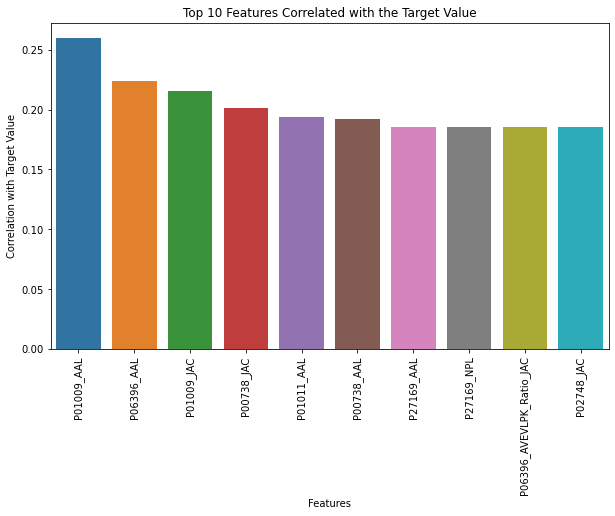

In [7]:
# Calculate the correlation between each feature and the target variable
corr_matrix = scaled_df.corr()['target']
# Sort the correlations in descending order and select the top N features
n_features = 10
top_corr_features = corr_matrix.abs().sort_values(ascending=False)[1:n_features+1]
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot a bar chart of the top N features
ax = sns.barplot(x=top_corr_features.index, y=top_corr_features)
# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target Value')
plt.title(f'Top {n_features} Features Correlated with the Target Value')
# Save the plot as a PNG image file in the Images folder
plt.savefig('../Images/correlation_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()